In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.tokenize import sent_tokenize

In [ ]:
import nltk
nltk.download('punckt')
nltk.download('stopwords')

[nltk_data] Error loading punckt: Package 'punckt' not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data=pd.read_csv('/content/train.csv (1).zip')

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data.shape

(20800, 5)

In [ ]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
data.duplicated().any()

False

<Axes: >

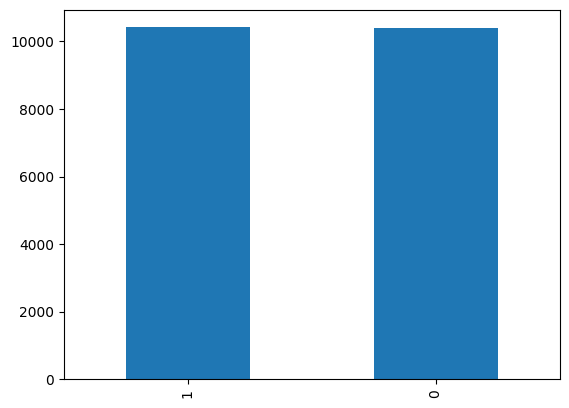

In [ ]:
data['label'].value_counts().plot(kind='bar')

In [ ]:
data=data.dropna(axis=0)

In [ ]:
data.drop('id',axis=1,inplace=True)

<ipython-input-113-9c5d1de220c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('id',axis=1,inplace=True)


In [ ]:
data['text_len']=data['text'].apply(lambda x:len(x))

<ipython-input-114-91e49be4d32a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_len']=data['text'].apply(lambda x:len(x))


In [ ]:
data['words_counts']=data['text'].apply(lambda x:len(x.split(" ")))

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data['sent_len']=data['text'].apply(lambda x:len(sent_tokenize(x)))

In [ ]:
data[data['label']==1]['words_counts'].mean()

707.5454316002019

In [ ]:
data[data['label']==1]['sent_len'].mean()

31.097425542655223

In [ ]:
data[data['label']==0]['sent_len'].mean()

41.903677251230576

real news text more average words count than fake news

In [ ]:
data[data['label']==0]['sent_len'].mean()

41.903677251230576

In [ ]:
data[data['label']==0]['author'].value_counts().sort_values(ascending=False).head()

Pam Key                242
Jerome Hudson          166
Charlie Spiering       141
John Hayward           140
Katherine Rodriguez    124
Name: author, dtype: int64

In [ ]:
data[data['label']==1]['author'].value_counts().sort_values(ascending=False).head()

admin          193
Pakalert        86
Eddy Lavine     85
Starkman        84
Gillian         82
Name: author, dtype: int64

author named admin wrote more fake news

In [ ]:
data.groupby('label').mean()

<ipython-input-124-8e1240de123d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('label').mean()


,text_len,words_counts,sent_len
label,,,
0,5199.010713,904.730431,41.903677
1,4278.694472,707.545432,31.097426


In [ ]:
data.shape

(18285, 7)

In [ ]:
len(data['author'].unique())

3838

In [ ]:
ps=PorterStemmer()

In [ ]:
stop_words=stopwords.words('english')
def text_preprocessing(text):
  text=re.sub('[^a-zA-Z]'," ",text)
  text=text.lower()
  text=text.split()
  text=[ps.stem(i) for i in text if i not in stop_words]
  text=" ".join(text)
  return text

In [ ]:
data['text']=data['text'].apply(text_preprocessing)

In [ ]:
data.head()

,title,author,text,label,text_len,words_counts,sent_len
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,hous dem aid even see comey letter jason chaff...,1,4930,820,37
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get feel life circl roundabout rather hea...,0,4160,727,29
2,Why the Truth Might Get You Fired,Consortiumnews.com,truth might get fire octob tension intellig an...,1,7692,1266,51
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,video civilian kill singl us airstrik identifi...,1,3237,559,27
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenc six year prison ir...,1,938,154,5


In [ ]:
x=data.iloc[:,2].values
y=data.iloc[:,3].values

In [ ]:
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=0)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.9437882764654418

In [ ]:
text=x_test[0]
label=model.predict(text)
if label==1:
  print('the news is fake')
else:
  print('the news is real')

the news is fake


In [ ]:
y_test[0]

1